# U.S. Medical Insurance Costs

### Introduction

Execution Date: 2025-02-27  
Analyst: Shafronov Semyon  
Data Source: Codecademy.com  

Goal - find relations between the dependent variable (insurance costs) and independent variables.

Hypothesis - smoking and age have strong relations with insurance costs.

#### Final conclusion

Charges can be split into three categories:  
• Low (0 - 12 thousand): the majority of non-smokers <br>• Medium (12 - 30 thousand): smokers with BMI ≤ 30 and the minority of non-smokers <br>• High (30 - 50 thousand): smokers with BMI > 30 <br>
Within each category, there is a positive relation between age and charges (the older the client is, the higher the charges).

#### Variables description

Age - Client age<br>Sex - Client gender<br>BMI - Body Mass Index<br>Children - Number of children<br>Smoker - Indicates if the client is a smoker<br>Region - Region where the client lives<br>Charges - Cost of insurance

### First look at the data

#### Libraries

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# UDF Library
import functions_lib as udf

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download Dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Number of rows and columns, non-null observations, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Conclusion

Dataset Characteristics:
• The dataset has 1,338 rows (clients) and 7 columns (client characteristics)
• There are no null values in any of the columns

### Primary data transformation

#### Variables types transformation (for analysis)

In [4]:
# Actual variable types
specific_types, general_types = udf.categorize_columns(df)
specific_types

{'numeric_discrete': ['age', 'children'],
 'numeric_continuous': ['bmi', 'charges'],
 'categorical_nominal': [],
 'categorical_ordinal': [],
 'categorical_binary': [],
 'temporal': [],
 'general': ['sex', 'smoker', 'region']}

Target Variable Types
1. From udf.categorize_columns (above), take the specific_types dictionary (actual).
2. Copy and paste the specific_types dictionary into target_dict.
3. Manually fill the target_dict with real-world variable types.

target_dict = {
    'numeric_discrete': [],      # int
    'numeric_continuous': [],    # float
    'categorical_nominal': [],    # string
    'categorical_ordinal': [],     # category
    'categorical_binary': [],       # boolean
    'temporal': [],                 # date, time, datetime, timestamp
    'general': []                   # object
}

The object data type is risky as it can contain multiple types. For example, if a string sneaks into an integer column, it will be classified as an object. It’s better to convert these to specific data types as an additional check.

Features with two categorical values (e.g., yes/no or male/female) should be converted to boolean only.

In [5]:
# Target variable types (filled by hand)
target_types = {
    'numeric_discrete': ['age', 'children'],
    'numeric_continuous': ['bmi', 'charges'],
    'categorical_nominal': ['region'],
    'categorical_ordinal': [],
    'categorical_binary': ['sex', 'smoker'],
    'temporal': [],
    'general': []
}

In [6]:
# Compare actual and target variable types
udf.compare_variable_types(target_types, specific_types)

numeric_discrete:
  match:
  - children
  - age

numeric_continuous:
  match:
  - charges
  - bmi

categorical_nominal:

categorical_ordinal:

categorical_binary:

temporal:

general:
  not match:
  - smoker (to be: categorical_binary)
  - sex (to be: categorical_binary)
  - region (to be: categorical_nominal)



In [7]:
# Convert categorical binary to bool
udf.binary_encode_columns(df, target_types['categorical_binary'])

Converted columns to boolean: ['sex -> sex_male', 'smoker -> smoker_no']


In [8]:
# Convert categorical nominal to string
df[target_types['categorical_nominal']] = df[target_types['categorical_nominal']].astype('string')

In [9]:
# Variable types after transformation
specific_types, general_types = udf.categorize_columns(df)
specific_types

{'numeric_discrete': ['age', 'children'],
 'numeric_continuous': ['bmi', 'charges'],
 'categorical_nominal': ['region'],
 'categorical_ordinal': [],
 'categorical_binary': ['sex_male', 'smoker_no'],
 'temporal': [],
 'general': []}

In [10]:
# Compare variable types after transformation with target types
udf.compare_variable_types(target_types, specific_types)

numeric_discrete:
  match:
  - children
  - age

numeric_continuous:
  match:
  - charges
  - bmi

categorical_nominal:
  match:
  - region

categorical_ordinal:

categorical_binary:
  not in target types:
  - sex_male
  - smoker_no

temporal:

general:



### Descriptive analysis

In [11]:
# Mode - most popular values
udf.top_n_popular_values(df, 5)

,column_name,value,count,percentage
0,age,18,69,5.16
1,age,19,68,5.08
2,age,50,29,2.17
3,age,51,29,2.17
4,age,47,29,2.17


,column_name,value,count,percentage
5,bmi,32.3,13,0.97
6,bmi,28.31,9,0.67
7,bmi,30.495,8,0.60
8,bmi,30.875,8,0.60
9,bmi,31.35,8,0.60


,column_name,value,count,percentage
10,children,0,574,42.90
11,children,1,324,24.22
12,children,2,240,17.94
13,children,3,157,11.73
14,children,4,25,1.87


,column_name,value,count,percentage
15,region,southeast,364,27.20
16,region,southwest,325,24.29
17,region,northwest,325,24.29
18,region,northeast,324,24.22


,column_name,value,count,percentage
19,charges,1639.5631,2,0.15
20,charges,16884.924,1,0.07
21,charges,29330.98315,1,0.07
22,charges,2221.56445,1,0.07
23,charges,19798.05455,1,0.07


,column_name,value,count,percentage
24,sex_male,True,676,50.52
25,sex_male,False,662,49.48


,column_name,value,count,percentage
26,smoker_no,True,1064,79.52
27,smoker_no,False,274,20.48


In [12]:
# Unique values
df.nunique()

age            47
bmi           548
children        6
region          4
charges      1337
sex_male        2
smoker_no       2
dtype: int64

In [13]:
# Descriptive statistics
df.describe(include='all')

,age,bmi,children,region,charges,sex_male,smoker_no
count,1338.000000,1338.000000,1338.000000,1338,1338.000000,1338,1338
unique,NaN,NaN,NaN,4,NaN,2,2
top,NaN,NaN,NaN,southeast,NaN,True,True
freq,NaN,NaN,NaN,364,NaN,676,1064
mean,39.207025,30.663397,1.094918,NaN,13270.422265,NaN,NaN
std,14.049960,6.098187,1.205493,NaN,12110.011237,NaN,NaN
min,18.000000,15.960000,0.000000,NaN,1121.873900,NaN,NaN
25%,27.000000,26.296250,0.000000,NaN,4740.287150,NaN,NaN
50%,39.000000,30.400000,1.000000,NaN,9382.033000,NaN,NaN
75%,51.000000,34.693750,2.000000,NaN,16639.912515,NaN,NaN


#### Conclusion

Sex:
• Males and females have equal proportions (51% / 49%)

Smokers:
• There are four times more non-smokers than smokers

Region:
• There are four distinct regions, which have equal proportions (flat distribution)

### Univariate Statistics

In [14]:
# Define target (dependent) variable if exists
target_variable = 'charges'

#### Numeric variables

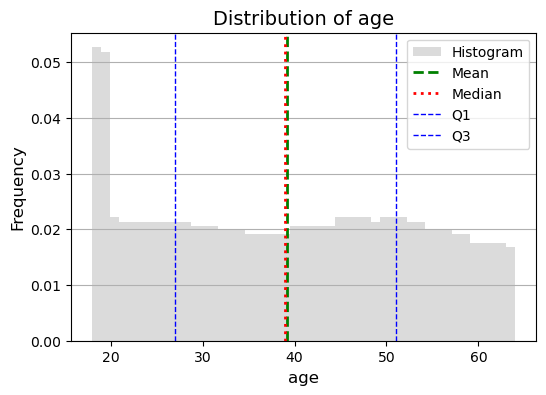

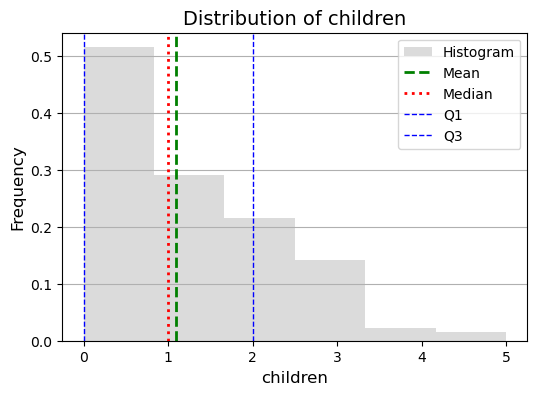

In [15]:
# Discrete variables
# Histogram with mean, median, IQR, outliers
for var_type in specific_types['numeric_discrete']:
    udf.numeric_distribution(df[var_type], variable_type='discrete')

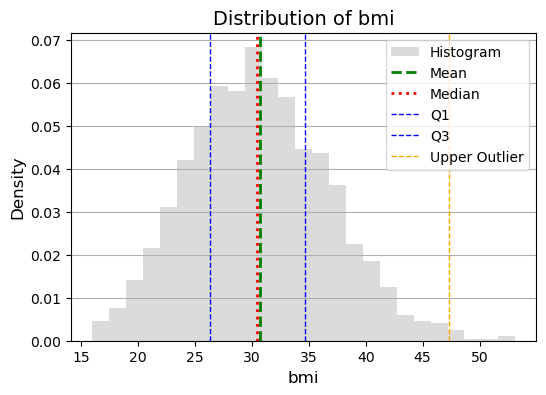

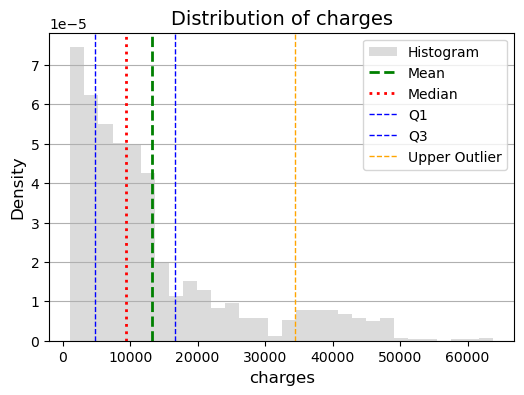

In [16]:
# Continuous variables
# Histogram with mean, median, IQR, outliers
for var_type in specific_types['numeric_continuous']:
    udf.numeric_distribution(df[var_type], variable_type='continuous')  # discrete/continuous

#### Conclusion

Charges: 
• Multimodal distribution.
• Charges can be split into three categories:
	- Low (0 - 12 thousand)
	- Medium (12 - 30 thousand)
	- High (30 - 50 thousand)
• The majority of clients are in the 'low' category, while the least number are in the 'high' category

Children: 
• Decreasing Distribution
• Range of the number of children is 0-5 (6 groups)
• Clients with children have a 57% share, while those without children have a 43% share

Age:
• Uniform (flat) distribution
• In the dataset, there are several times more clients aged 18-19 than clients older than 19

BMI:
• Normal distribution with mean and median around 30, and IQR: 26-35

### Bivariate Statistics

#### Two Numeric Variables

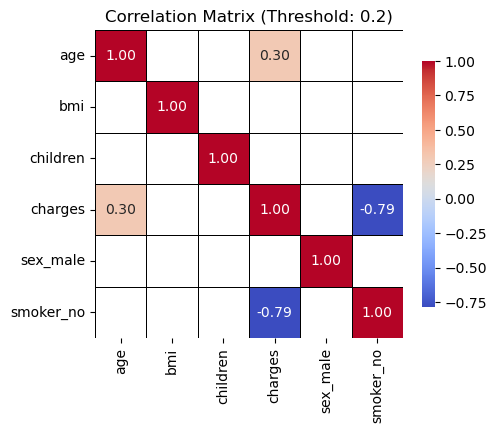

In [17]:
# Correlation matrix
udf.plot_correlation_heatmap(df, 0.2)

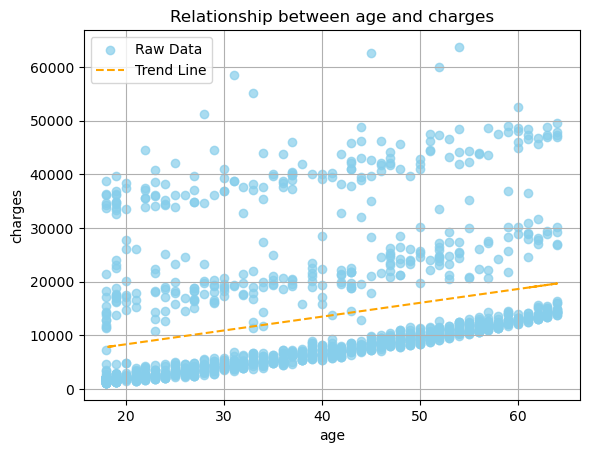

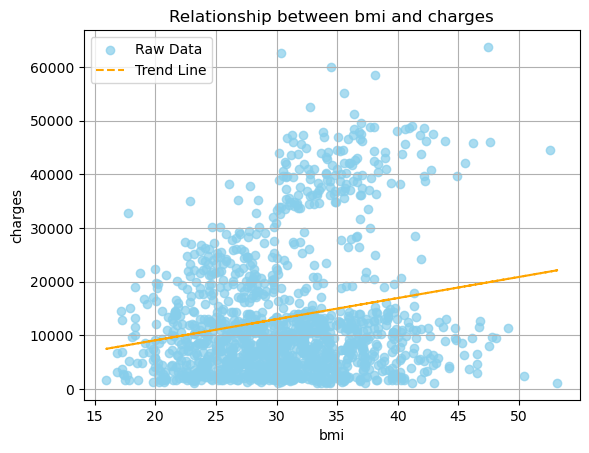

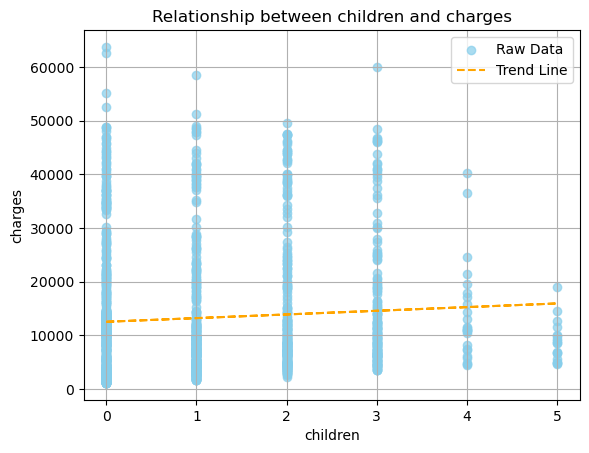

Skipping plot for charges and charges because they are the same.


In [18]:
# Scatter plot
for var in general_types['numeric']:
    # agg_func can be: None, 'mean', 'median', 'std', 'max', 'min', 'count', 'nunique'
    udf.two_numeric_relationship(df, x = var, y = target_variable, agg_func=None)

#### One Numeric Variable and One Categorical Variable

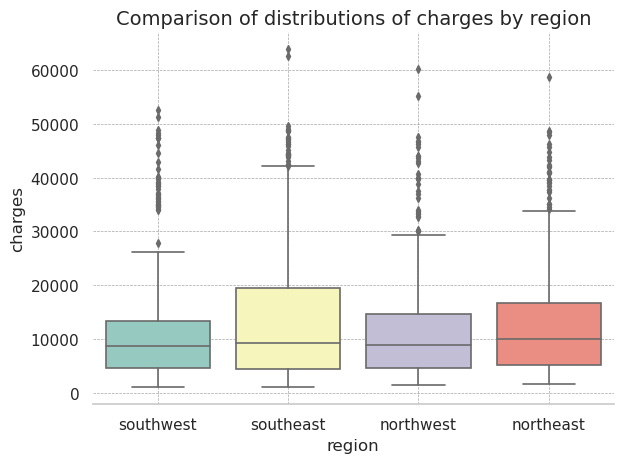

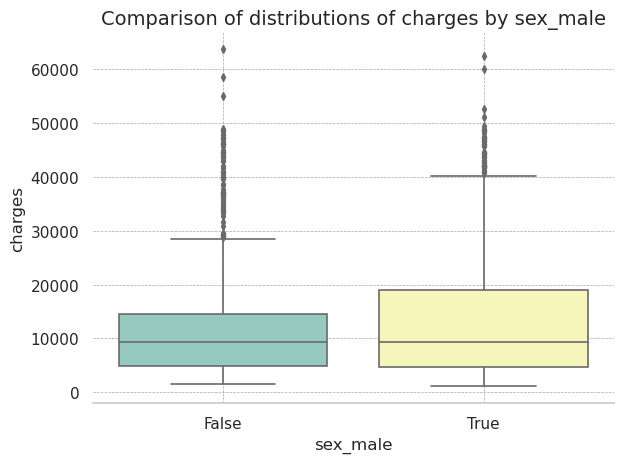

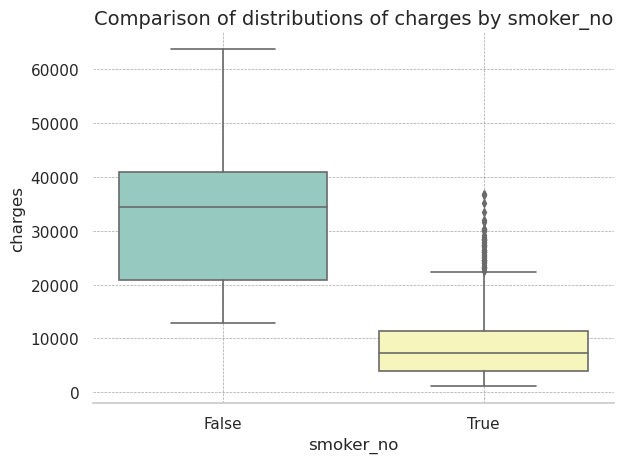

In [19]:
# Side-by-Side Box Plots 
# Comparison of distribution of charges by categorical variables
for var_type in general_types['categorical']:
    udf.categorical_numeric_relationship(df, x=var_type, y=target_variable)

#### Conclusion

Age/BMI and Charges:
• There is a positive relationship
• Age groups (as well as BMI) are visually split into three groups by charges (low, medium, high)

Smoker and Charges:
• There is a strong positive relationship, with significantly higher charges for smokers

Region/Sex/Children and Charges:
• There are no or weak relationships

### Multivariate Statistics

#### Two numeric and one categorical

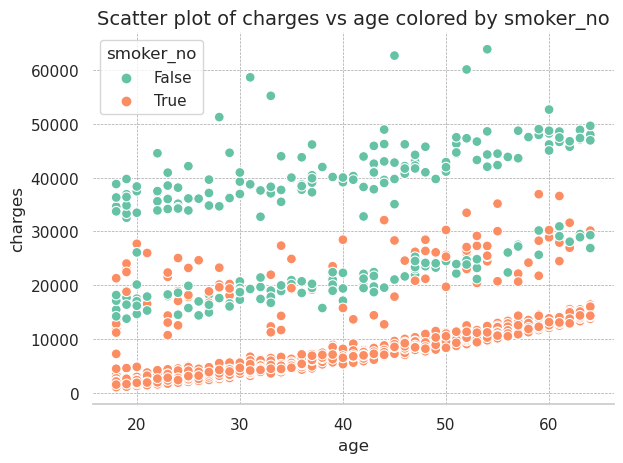

In [20]:
# Scatter plots with visual cues (such as colors, shapes, and sizes)
udf.two_numeric_one_categorical(df, x='age', y='charges', hue='smoker_no')

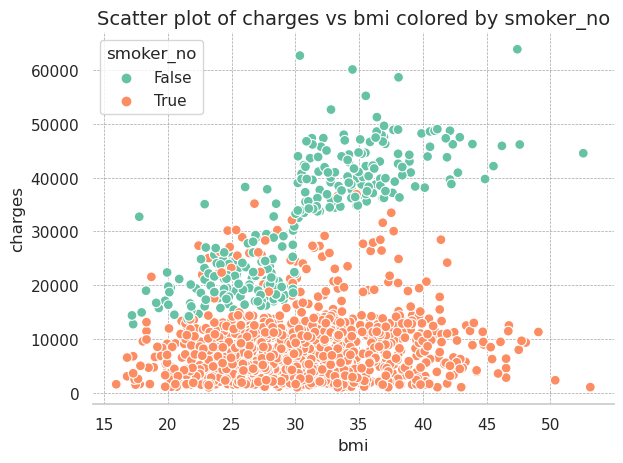

In [21]:
# BMI is crucial for smokers; with BMI over 30, there are only high-charged clients
# Scatter plots with visual cues (such as colors, shapes, and sizes)
udf.two_numeric_one_categorical(df, x='bmi', y='charges', hue='smoker_no')

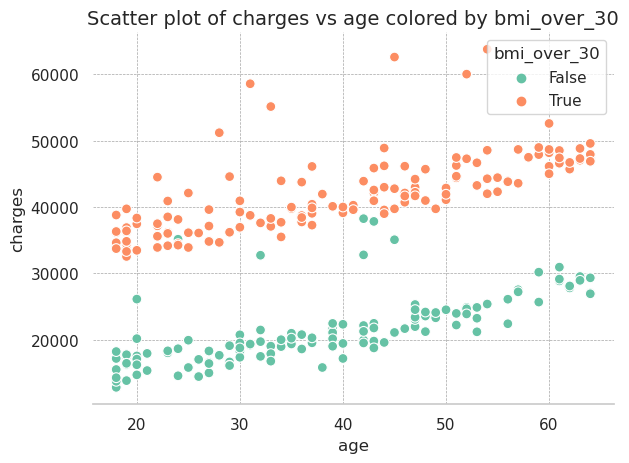

In [22]:
# Looking closer, we see: there are 2 charge groups (medium and high) for smokers depending on BMI: 
# <= 30 and > 30.
df['bmi_over_30'] = df['bmi'] > 30
udf.two_numeric_one_categorical(df[df.smoker_no == 0], x='age', y='charges', hue='bmi_over_30')
plt.show()

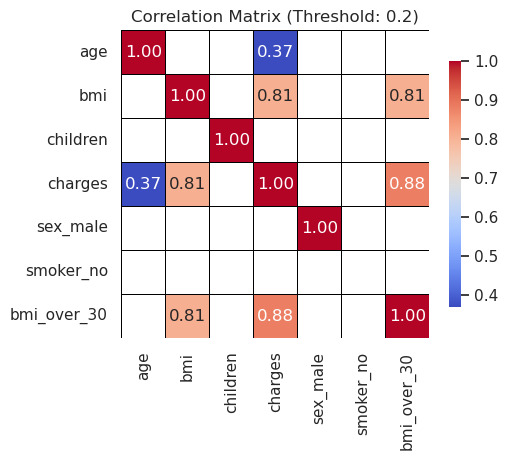

In [23]:
# Correlation matrix for smokers
udf.plot_correlation_heatmap(df[df.smoker_no == 0], 0.2)

#### Two categorical and one numeric

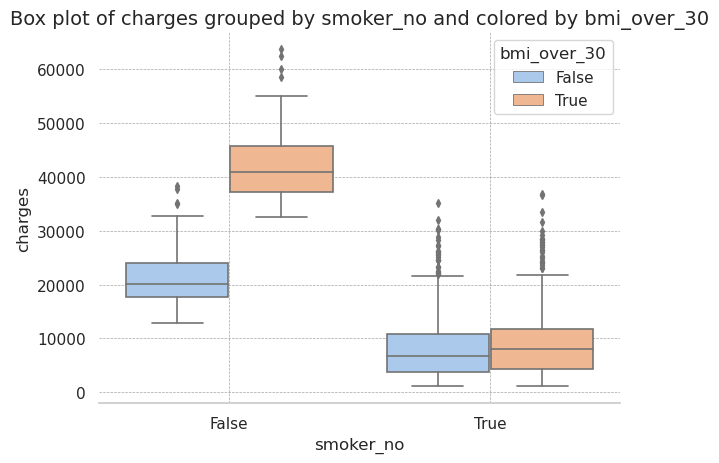

In [24]:
# Grouped box plots
udf.two_categorical_one_numeric(df, x="smoker_no", y="charges", hue="bmi_over_30")

#### Conclusion

Charges can be split into three categories:
• Low: No smokers
• Medium: Smokers with a BMI less than 30 (mixed with a small portion of non-smokers)
• High: Smokers with a BMI over 30
Within each category, there is a strong positive relationship between age and charges.

Unanswered question: Why did the smallest portion of non-smokers fall into the medium charge category? The variable used to distinguish non-smokers into low- and medium-charge categories was not identified.